In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 144 kB/s 


In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 25 kB/s 


**PREPROCESSING**

In [ ]:
# 1.  Read original CTs (Drive/nifti/pre)

import os
files = os.listdir('/content/drive/MyDrive/Segmentation/Images/nifti/pre')

print(files)

['burdeos_001_0000.nii.gz', 'burdeos_010_0000.nii.gz', 'burdeos_100_0000.nii.gz', 'burdeos_101_0000.nii.gz', 'burdeos_102_0000.nii.gz', 'burdeos_103_0000.nii.gz', 'burdeos_104_0000.nii.gz', 'burdeos_105_0000.nii.gz', 'burdeos_106_0000.nii.gz', 'burdeos_107_0000.nii.gz', 'burdeos_108_0000.nii.gz', 'burdeos_109_0000.nii.gz', 'burdeos_011_0000.nii.gz', 'burdeos_110_0000.nii.gz', 'burdeos_111_0000.nii.gz', 'burdeos_112_0000.nii.gz', 'burdeos_113_0000.nii.gz', 'burdeos_114_0000.nii.gz', 'burdeos_115_0000.nii.gz', 'burdeos_116_0000.nii.gz', 'burdeos_117_0000.nii.gz', 'burdeos_118_0000.nii.gz', 'burdeos_119_0000.nii.gz', 'burdeos_012_0000.nii.gz', 'burdeos_120_0000.nii.gz', 'burdeos_121_0000.nii.gz', 'burdeos_122_0000.nii.gz', 'burdeos_123_0000.nii.gz', 'burdeos_124_0000.nii.gz', 'burdeos_125_0000.nii.gz', 'burdeos_126_0000.nii.gz', 'burdeos_127_0000.nii.gz', 'burdeos_128_0000.nii.gz', 'burdeos_129_0000.nii.gz', 'burdeos_013_0000.nii.gz', 'burdeos_130_0000.nii.gz', 'burdeos_131_0000.nii.gz', 

In [ ]:
# 2.  Extract non-repeated Bordeaux cases from Excel (131)
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Automatic_ostium_detection/Marta_Excel_final_final.xlsx', engine = 'openpyxl')
print(df.Patient_ID)


list_ID = []

for i in df.Patient_ID:
  list_ID.append(i)

0       54
1       18
2       47
3       14
4       36
      ... 
126    141
127    140
128    138
129    135
130     97
Name: Patient_ID, Length: 131, dtype: int64


In [ ]:
# 3.  Copy non-repeated CT cases from nifti/pre to /Images_segmentation folder

import shutil
for f in files:
  case1=f.split('.')[0]
  case2 = int(case1.split('_')[1])
  if case2 in list_ID:
    print('/content/drive/MyDrive/Segmentation/Images/nifti/pre/'+f)
    shutil.copy('/content/drive/MyDrive/Segmentation/Images/nifti/pre/'+f, '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/'+f )

/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_001_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_101_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_102_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_104_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_109_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_011_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_112_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_113_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_114_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_012_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_128_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_013_0000.nii.gz
/content/drive/MyDrive/Segmentation/Images/nifti/pre/burdeos_135_0000.nii.gz

ValueError: ignored

In [ ]:
# 4. Print original number of slices of CTs


import SimpleITK as sitk
import numpy as np
import os

cur_dir = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/'
dir_with_img = os.path.join(cur_dir, 'Images_segmentation')
dir = os.listdir(dir_with_img)
print(len(dir))


list_mal=[]
list_sizes = []
for sub_dir in dir:
  if sub_dir == '.DS_Store':
      continue

  if sub_dir.startswith('d'):
      continue
  case = int(sub_dir.split('_')[1])
  path_to_sitk_image = os.path.join(dir_with_img,sub_dir)
  print('Reading Image at:', path_to_sitk_image)

  image = sitk.ReadImage(path_to_sitk_image)
  # Calculating new spacing
  img_size = np.asarray(image.GetSize())
  print(img_size[2])
  list_sizes.append(img_size[2])

print(min(list_sizes))
print(max(list_sizes))


131
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_001_0000.nii.gz
305
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_101_0000.nii.gz
305
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_102_0000.nii.gz
339
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_104_0000.nii.gz
305
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_109_0000.nii.gz
305
Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_011_0000.nii.gz
350
Reading Image at: 

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/')))

131


In [ ]:
# 5. Copy CTs from /Images_segmentation directory to LAA_todo_original/burdeos_x/image.nii.gz for pre-processing 

cur_dir = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/'
#dir_with_img_ori = os.path.join(cur_dir, 'pre')
#dir_with_img_ori2 = os.path.join(cur_dir, 'LAA_Bordeaux_original')

dir1 = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/'

for im in os.listdir(dir1):
    case1 = im.split('.')[0]
    case2 = int(case1.split('_')[1])

    path1 = os.path.join(cur_dir, 'burdeos_'+str(case2))

    if not os.path.exists(path1):
      os.mkdir(path1)
      path2 = os.path.join(path1,'image')
      if not os.path.exists(path2):
        os.mkdir(path2)

        shutil.copy(dir1+'/'+im, path2+'/image.nii.gz' )

In [ ]:
print(len(os.listdir( '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/')))

131


In [ ]:
# Preprocessing function (resample images to output spacing [1 1 1])

def resample_image(itk_image, out_spacing=[1.0, 1.0, 1.0], is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))
    ]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image) 

In [ ]:
import SimpleITK as sitk
import os

os.path.exists( "/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/burdeos_1/image/image.nii.gz")
image = sitk.ReadImage("/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/burdeos_1/image/image.nii.gz")

In [ ]:
os.path.exists('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_101_0000.nii.gz')
image = sitk.ReadImage('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_101_0000.nii.gz')

In [ ]:
import SimpleITK as sitk
import numpy as np
import os

cur_dir = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/'
dir_with_img = os.path.join(cur_dir, 'Images_segmentation')
dir = os.listdir(dir_with_img)


list_mal=[]
for sub_dir in dir:
  if sub_dir == '.DS_Store':
      continue

  if sub_dir.startswith('d'):
      continue
  case = int(sub_dir.split('_')[1])
  path_to_sitk_image = os.path.join(dir_with_img,sub_dir)
  print('Reading Image at:', path_to_sitk_image)

  image = sitk.ReadImage(path_to_sitk_image)
  # Calculating new spacing
  img_size = np.asarray(image.GetSize())
  img_spacing = np.asarray(image.GetSpacing())
  my_image_size = np.asarray((256,256,305))
  new_spacing = img_spacing*(img_size/my_image_size)
  print(f'Resampling from {img_size} to {my_image_size}.\nPrevious Spacing {img_spacing}\tNew Spacing {new_spacing}')
  newimage  = resample_image(image, out_spacing=new_spacing, is_label=False)

  dest_dir_img = os.path.join(cur_dir, 'Images_segmentation_resampled')

  
  outputImageFileName = os.path.join(dest_dir_img,sub_dir)
  writer = sitk.ImageFileWriter()
  writer.SetFileName(outputImageFileName)
  #writer.SetUseCompression(True)
  print(f'Writing to : {outputImageFileName}\n')
  writer.Execute(newimage)


Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_001_0000.nii.gz
Resampling from [512 512 305] to [256 256 305].
Previous Spacing [0.41601562 0.41601562 0.5       ]	New Spacing [0.83203125 0.83203125 0.5       ]
Writing to : /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/burdeos_001_0000.nii.gz

Reading Image at: /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation/burdeos_101_0000.nii.gz
Resampling from [512 512 305] to [256 256 305].
Previous Spacing [0.34960938 0.34960938 0.5       ]	New Spacing [0.69921875 0.69921875 0.5       ]
Writing to : /content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/burdeos_101_0000.nii.gz

Reading Image at: /content/drive/MyDrive/Automatic_ostium_

In [ ]:
os.path.exists('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/burdeos_101/image/image.nii.gz')
image = sitk.ReadImage('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_todo_original/burdeos_101/image/image.nii.gz')

In [ ]:
# Here we get the resampled images (/Images_segmentation_resampled) and perform a flip in the second dimension. 

# These images will be the input to the RL algorithm

import os
import nibabel as nib
import numpy as np 
import pandas as pd 
from natsort import natsorted, ns
import SimpleITK as sitk
import matplotlib.pyplot as plt


import SimpleITK as sitk
import numpy as np
import os

cur_dir = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/'
dir_with_img = os.path.join(cur_dir, 'Images_segmentation_resampled')
dir = os.listdir(dir_with_img)


list_mal=[]
for sub_dir in dir:
  if sub_dir == '.DS_Store':
      continue

  if sub_dir.startswith('d'):
      continue
  case = int(sub_dir.split('_')[1])

  reader = sitk.ImageFileReader()
  reader.SetImageIO("NiftiImageIO")
  reader.SetFileName(os.path.join(dir_with_img,sub_dir ))
  image = reader.Execute()
  image2 = image[:, ::-1, :]
  sitk.WriteImage(image2, '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/images_flip_tot/burdeos_'+str(case)+'.nii.gz')  




In [ ]:

cur_dir = '/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/'
dir_with_img = os.path.join(cur_dir, 'Images_segmentation')
dir = os.listdir(dir_with_img)
dest_dir_img = os.path.join(cur_dir, 'Images_segmentation_resampled')
print(len(os.listdir(dest_dir_img)))

131


In [ ]:
#Here we write the path of the preprocessed images to a .txt so that the algorithm knows where to find them
import os
with open('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/images_tot.txt', 'w') as f:
    for case in os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/images_flip_tot'):
      f.write('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/images_flip_tot/'+case)


In [ ]:
 for case in os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/images_flip_tot'):
      caso=case.split('.')[0]
      print('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/'+caso+'.txt')

/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_1.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_101.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_102.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_104.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_109.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_11.txt
/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_112

The images have been pre-processed. Go to Inference_RL.ipynb notebook to execute RL code

-----------------------------------------------------------------
**VISUALIZATION OF OSTIUM PREDICTION RESULTS**

In [ ]:
import os
import nibabel as nib
import numpy as np 
import pandas as pd 
from natsort import natsorted, ns
import SimpleITK as sitk
import matplotlib.pyplot as plt


df3 = pd.read_excel('/Users/martasaiz/Documents/results_csv_tot.xlsx',
     engine='openpyxl',
)

frames=[]
for case,n in zip(df3.filename,range(len(df3.filename))):

     print(case)
     case_num = case.split('_')[1]
     #epi_img = nib.load('/Users/martasaiz/Downloads/LAA_Bordeaux_resampled/'+case+'/image/image.nii')


FileNotFoundError: ignored

In [ ]:
#FROM PHYSICAL COORDINATES TO VOXEL

#Visualization of ostium manual annotations I had from VIDAA in the excel /Marta_Excel_final_final.xlsx (physical point) in the CT images (voxel)


import os
import nibabel as nib
import numpy as np 
import pandas as pd 
from natsort import natsorted, ns
import SimpleITK as sitk
import matplotlib.pyplot as plt


df3 = pd.read_excel('/content/drive/MyDrive/Automatic_ostium_detection/Marta_Excel_final_final.xlsx',
     engine='openpyxl',
)

list_id = []
for i in df3.Patient_ID:
  list_id.append(i)


for case in os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/')[:1]:


    case_num = case.split('.')[0]
    case_num2 = int(case_num.split('_')[1])
    print('case_num2', case_num2)
    ind = list_id.index(case_num2)
    print(df3.Patient_ID[ind])
    epi_img = nib.load('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'+case)
    matrix_transf = epi_img.affine

    pixel_spacing = np.array(matrix_transf).diagonal()
    pixel_spacing  = abs(pixel_spacing[0:3])

    print(pixel_spacing)


    origin_ima = matrix_transf[:,3]
    origin_ima  = np.array((-origin_ima[0], -origin_ima[1], origin_ima[2]))


    print(origin_ima)


    x = df3.ostium_pos_x[ind]
    y = df3.ostium_pos_y[ind]
    z = df3.ostium_pos_z[ind]

    xyz = np.array((x,y,z))

    if df3.RAS2LPS[ind] == 1:
        print(case,'yes')
        xyz = np.array((-x,-y,z))

    print('world',xyz)

    image = sitk.Image([256, 256, 305], sitk.sitkVectorFloat32)
    image.SetOrigin((origin_ima[0],origin_ima[1],origin_ima[2]))
    image.SetSpacing((pixel_spacing[0], pixel_spacing[1], pixel_spacing[2]))
    m=image.TransformPhysicalPointToContinuousIndex(xyz)
  

    x2=abs(int(m[0]))
    y2=256-abs(int(m[1]))
    z2=abs(int(m[2]))

    print('me', x2,y2,z2)


    #with open('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_' +str(case_num2) + '.txt','w') as f:
    #  f.write('%d' % x +','+'%d' % y +','+'%d' % z)

   

case_num2 1
1
[0.83203125 0.83203125 0.5       ]
[-105.29199219  -72.70800781  410.72497559]
burdeos_001_0000.nii.gz yes
world [  -3.11263731 -142.879242    517.93972234]
me 122 172 214
case_num2 101
101
[0.69921875 0.69921875 0.5       ]
[-80.32519531 -46.17480469 770.22497559]
world [   7.63623932 -125.8310592   869.23560499]
me 125 143 198
case_num2 102
102
[0.921875   0.921875   0.55573773]
[-101.76953125  -71.73046875  439.22497559]
burdeos_102_0000.nii.gz yes
world [   9.48626416 -145.81981477  568.07287672]
me 120 176 231
case_num2 104
104
[0.7890625 0.7890625 0.5      ]
[-67.80273438 -76.69726562 170.2250061 ]
burdeos_104_0000.nii.gz yes
world [  25.10474174 -156.8011907   275.54350491]
me 117 155 210
case_num2 109
109
[0.90234375 0.90234375 0.5       ]
[ -76.27441406 -101.22558594 1082.72497559]
world [  31.34882427 -195.75778588 1168.91547206]
me 119 152 172
case_num2 11
11
[1.02734375 1.02734375 0.45901814]
[ -92.24316406  -28.25683594 -240.1005249 ]
burdeos_011_0000.nii.gz 

case_num2 1
1
[0.83203125 0.83203125 0.5       ]
[-105.29199219  -72.70800781  410.72497559]
burdeos_001_0000.nii.gz yes
world [  -3.11263731 -142.879242    517.93972234]
me 122 172 214


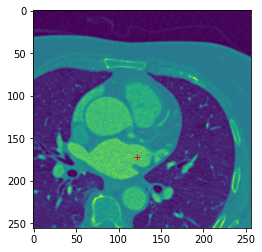

In [4]:
#FROM PHYSICAL COORDINATES TO VOXEL

#Visualization of ostium manual annotations I had from VIDAA in the excel /Marta_Excel_final_final.xlsx (physical point) in the CT images (voxel)


import os
import nibabel as nib
import numpy as np 
import pandas as pd 
from natsort import natsorted, ns
import SimpleITK as sitk
import matplotlib.pyplot as plt


df3 = pd.read_excel('/content/drive/MyDrive/Automatic_ostium_detection/Marta_Excel_final_final.xlsx',
     engine='openpyxl',
)

list_id = []
for i in df3.Patient_ID:
  list_id.append(i)


for case in os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/')[:1]:


    case_num = case.split('.')[0]
    case_num2 = int(case_num.split('_')[1])
    print('case_num2', case_num2)
    ind = list_id.index(case_num2)
    print(df3.Patient_ID[ind])
    epi_img = nib.load('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'+case)
    matrix_transf = epi_img.affine

    pixel_spacing = np.array(matrix_transf).diagonal()
    pixel_spacing  = abs(pixel_spacing[0:3])

    print(pixel_spacing)


    origin_ima = matrix_transf[:,3]
    origin_ima  = np.array((-origin_ima[0], -origin_ima[1], origin_ima[2]))


    print(origin_ima)


    x = df3.ostium_pos_x[ind]
    y = df3.ostium_pos_y[ind]
    z = df3.ostium_pos_z[ind]

    xyz = np.array((x,y,z))

    if df3.RAS2LPS[ind] == 1:
        print(case,'yes')
        xyz = np.array((-x,-y,z))

    print('world',xyz)

    image = sitk.Image([256, 256, 305], sitk.sitkVectorFloat32)
    image.SetOrigin((origin_ima[0],origin_ima[1],origin_ima[2]))
    image.SetSpacing((pixel_spacing[0], pixel_spacing[1], pixel_spacing[2]))
    m=image.TransformPhysicalPointToContinuousIndex(xyz)
  

    x2=abs(int(m[0]))
    y2=256-abs(int(m[1]))
    z2=abs(int(m[2]))

    print('me', x2,y2,z2)

    reader = sitk.ImageFileReader()
    reader.SetImageIO("NiftiImageIO")
    reader.SetFileName('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'+case)
    image = reader.Execute()

    #pred
    image2 = image[:,:,int(z2)]
    image3  = sitk.GetArrayViewFromImage(image2)

     
    image4 = np.flipud(image3)

    plt.imshow(image4)
    plt.plot(abs(int(x2)),abs(int(y2)),'r+')
    plt.show()



    #with open('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/LAA_testing/landmarks_flip_tot/burdeos_' +str(case_num2) + '.txt','w') as f:
    #  f.write('%d' % x +','+'%d' % y +','+'%d' % z)

0      burdeos_101
1      burdeos_102
2      burdeos_104
3      burdeos_109
4       burdeos_11
          ...     
128     burdeos_97
129     burdeos_98
130      burdeos_1
131            NaN
132            NaN
Name: filename, Length: 133, dtype: object
xyz_transformed_pred (4.0693359375, -159.0419921875, 1746.5860629081726)
yes ras2lps
xyz_transformed_pred2 [  -4.06933594  159.04199219 1746.58606291]
[  -2.91699219  155.58496094 1751.28143132]


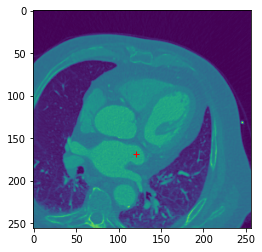

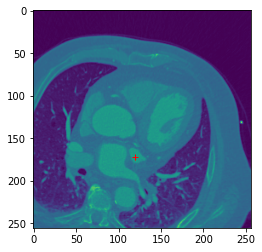

In [ ]:
#VISUALIZATION OF PREDICTION IN IMAGE, THEN CONVERSION TO PHYSICAL POINT AND SAVE IN EXCEL (ostium_pred_RL.xlsx)

#FROM VOXEL TO COORDINATES

import os
import nibabel as nib
import numpy as np 
import pandas as pd 
from natsort import natsorted, ns
import SimpleITK as sitk
import matplotlib.pyplot as plt


df3 = pd.read_excel('/content/drive/MyDrive/Automatic_ostium_detection/results_csv_tot.xlsx',
     engine='openpyxl',
)

df4 = pd.read_excel('/content/drive/MyDrive/Automatic_ostium_detection/Marta_Excel_final_final.xlsx',
     engine='openpyxl',
)

frames=[]
list_id = []

print(df3.filename)
for case in df3.filename[0:131]:

  if case == 'nan':
    continue
  else:
    num = int(case.split('_')[1])
    list_id.append(num)

list_pred_xl = []
for caso in df4.Patient_ID:
    list_pred_xl.append(int(caso))


for case,n in zip(os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'), range(len(os.listdir('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/')))):

  

     case_num = case.split('.')[0]
     case_num2 = int(case_num.split('_')[1])
     #print('case_num2', case_num2)

     if case_num2 == 50:
      ind = list_id.index(case_num2)
      epi_img = nib.load('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'+case)
      matrix_transf = epi_img.affine

      ind_pred_xl = list_pred_xl.index(int(case_num2))
      #print(df4.Patient_ID[ind_pred_xl])

      pixel_spacing = np.array(matrix_transf).diagonal()
      pixel_spacing  = abs(pixel_spacing[0:3])

      origin_ima = matrix_transf[:,3]
      origin_ima  = np.array((-origin_ima[0], -origin_ima[1], origin_ima[2]))

      image = sitk.Image([256, 256, 305], sitk.sitkVectorFloat32)
      image.SetOrigin((origin_ima[0],origin_ima[1],origin_ima[2]))
      image.SetSpacing((pixel_spacing[0], pixel_spacing[1], pixel_spacing[2]))

      pred_x = df3.final_coordinates_x[ind]
      pred_y = df3.final_coordinates_y[ind]
      pred_z = df3.final_coordinates_z[ind]

      target_x = df3.target_x[ind]
      target_y = df3.target_y[ind]
      target_z = df3.target_z[ind]


      pred = np.array((float(pred_x),float(-(256-pred_y)),float(pred_z)))
      xyz2_pred = image.TransformContinuousIndexToPhysicalPoint(pred)
      print('xyz_transformed_pred',xyz2_pred)

      target = np.array((float(target_x),float(-(256-target_y)),float(target_z)))
      target_pred = image.TransformContinuousIndexToPhysicalPoint(target)

      if df4.RAS2LPS[ind_pred_xl] ==  1:
          print('yes ras2lps')
          xyz2_pred = np.array((-xyz2_pred[0],-xyz2_pred[1],xyz2_pred[2]))
          print('xyz_transformed_pred2',xyz2_pred)
          target_pred2 = np.array((-target_pred[0],-target_pred[1],target_pred[2]))
          print(target_pred2)


      raw_data = {'Case': case, 'ostium_pred_x':[xyz2_pred[0]], 'ostium_pred_y': [xyz2_pred[1]],'ostium_pred_z': [xyz2_pred[2]]}
      columns=['Case', 'ostium_pred_x','ostium_pred_y','ostium_pred_z']
      df = pd.DataFrame(raw_data, columns=['Case', 'ostium_pred_x','ostium_pred_y','ostium_pred_z'])
      frames.append(df)

      reader = sitk.ImageFileReader()
      reader.SetImageIO("NiftiImageIO")
      reader.SetFileName('/content/drive/MyDrive/Automatic_ostium_detection/RL_landmark_detection_for_cardiac_applications/Images_segmentation_resampled/'+case)
      image = reader.Execute()

      #pred
      image2 = image[:,:,int(pred_z)]
      image3  = sitk.GetArrayViewFromImage(image2)
      image4 = np.flipud(image3)

      plt.imshow(image4)
      plt.plot(abs(int(pred_x)),abs(int(pred_y)),'r+')
      plt.show()

      #image4 = np.flipud(image3)

      image2 = image[:,:,int(target_z)]
      image3  = sitk.GetArrayViewFromImage(image2)
      image4 = np.flipud(image3)
      plt.imshow(image4)
      plt.plot(int(target_x),int(target_y),'r+')
      #plt.plot(abs(int(pred_x[0])),256-abs(int(pred_y[1])),'b+')
      plt.show()


     #if n == 130:
     # result = pd.concat(frames)
                    # All results are stored in this path
     # out_fcsv = '/content/drive/MyDrive/Automatic_ostium_detection/ostium_pred_RL_2.xlsx'
                    
     # result.to_excel(out_fcsv)

     # print ("Finishing...")
     #else:
     #     pass